<a href="https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/Donut/DocVQA/Creating_a_toy_DocVQA_dataset_for_Donut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a toy DocVQA dataset for Donut

In this notebook, we'll show how to prepare a dataset for document visual question answering (DocVQA) for Donut.

The idea is to create a "ground_truth" column, which contains the ground truth JSON that the model needs to generate.

## Set-up environment

In [ ]:
!pip install -q datasets

     |████████████████████████████████| 365 kB 12.7 MB/s 
     |████████████████████████████████| 1.2 MB 66.6 MB/s 
     |████████████████████████████████| 141 kB 88.3 MB/s 
     |████████████████████████████████| 212 kB 89.0 MB/s 
     |████████████████████████████████| 115 kB 86.3 MB/s 
     |████████████████████████████████| 127 kB 83.0 MB/s 


## Load dataset

We'll create a minimal DocVQA toy dataset. Let's first load an existing one from the [🤗 hub](https://huggingface.co/).

In [ ]:
from datasets import load_dataset

# load a multilingual DocVQA dataset
dataset = load_dataset("olemeyer/docvqa-en-de-fr-es-it")

Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/olemeyer___parquet/olemeyer--docvqa-en-de-fr-es-it-7cb6a5ecdebced68/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

As can be seen, this dataset contains a train and test split.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 31004
    })
    test: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 4055
    })
})

Let's look at an example:

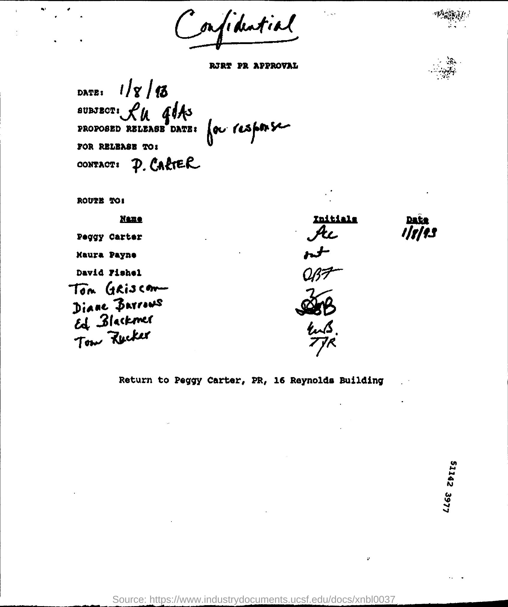

In [ ]:
example = dataset['train'][0]
image = example['image']
width, height = image.size
image.resize((int(width*0.3), int(height*0.3)))

Each document has a corresponding question, in 5 languages:

In [ ]:
example['query']

{'de': 'Wie lautet das Datum, das in diesem Brief erwähnt wird?',
 'en': 'what is the date mentioned in this letter?',
 'es': '¿Cuál es la fecha mencionada en esta carta?',
 'fr': 'Quelle est la date mentionnée dans cette lettre?',
 'it': 'Qual è la data indicata in questa lettera?'}

Let's look at the corresponding answer(s):

In [ ]:
example['answers']

['1/8/93']

Note that, for a DocVQA dataset, it may happen that for a given question, multiple correct answers are possible (e.g. a short or longer version of a given name). This is why there's an "answers" column in the dataset, rather than just an "answer" column.

## Create toy dataset

We first just create a small subset of the dataset loaded above. We use the [select](https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.select) method for that purpose.

In [ ]:
train_dataset = dataset["train"]

In [ ]:
train_dataset = train_dataset.select(range(1000))

In [ ]:
test_dataset = dataset["test"]

In [ ]:
test_dataset = test_dataset.select(range(200))

In [ ]:
from datasets import DatasetDict

toy_dataset = DatasetDict(
    {"train": train_dataset,
     "test": test_dataset,
})

In [ ]:
toy_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 200
    })
})

We'll push this tiny subset to the hub.

In [ ]:
toy_dataset.push_to_hub("nielsr/docvqa_1200_examples")

  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1951: FutureWarning: `identical_ok` has no effect and is deprecated. It will be removed in 0.11.0.
  FutureWarning,


  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

## Add ground_truth for Donut

Donut requires you to add a column with some ground truth JSON/txt/JSON lines/whatever that you'd like the model to learn to generate. Below, we define a function that we'll apply on the entire dataset to add this column.

For DocVQA, the template looks like {gt_parses: [{"question" : {question_sentence}, "answer" : {answer_candidate_1}}, {"question" : {question_sentence}, "answer" : {answer_candidate_2}}, ...]}.

For example, {gt_parses: [{"question" : "what is the model name?", "answer" : "donut"}, {"question" : "what is the model name?", "answer" : "document understanding transformer"}]}.

The Donut authors also note: "in case your dataset has multiple answers, `gt_parses` should be a list of dictionaries, each containing a question-answer pair." In case your dataset only has single answers to each question, then you can create just a `gt_parse` rather than `gt_parses`.

In [ ]:
from datasets import load_dataset

toy_dataset = load_dataset("nielsr/docvqa_1200_examples_donut")

Downloading:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

Using custom data configuration nielsr--docvqa_1200_examples_donut-2fd6ef62bc12fd93


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/nielsr___parquet/nielsr--docvqa_1200_examples_donut-2fd6ef62bc12fd93/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import re

def add_ground_truth(examples):
  images = examples['image']
  queries = [query['en'] for query in examples['query']]
  answers = examples['answers']

  ground_truths = []
  for image, query, answers in zip(images, queries, answers):
    # we need to escape " characters appearing in the query and/or answer
    query = query.replace("\\", "") # this was just one corrupt example (index 91 of training set)
    query = re.sub(' +', ' ', query)
    query = query.replace('"', '\\"')
    # let's create the ground truth string
    ground_truth_example = '{"gt_parses": ['
    for idx, answer in enumerate(answers):
      answer = answer.replace('"', '\\"')
      ground_truth_example += '{"question" : "' + query + '", "answer" : "' + answer + '"}'
      # add comma
      if idx != len(answers) - 1:
        ground_truth_example += ', '
    ground_truth_example += ']}'
    ground_truths.append(ground_truth_example)
  
  examples['ground_truth'] = ground_truths
  
  return examples

toy_dataset = toy_dataset.map(add_ground_truth, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

It's important to verify that this added JSON can be properly read:

In [ ]:
import json

example = toy_dataset['train'][135]
json.loads(example['ground_truth'])

{'gt_parses': [{'answer': 'phosphoric acid',
   'question': 'Which acid do the coca-cola company use to provide a pleasant tartness?'}]}

In [ ]:
example = toy_dataset['train'][58]
json.loads(example['ground_truth'])

{'gt_parses': [{'answer': 'J. T. WINEBRENNER',
   'question': 'What is the name of the person in the "FROM" field?'}]}

In [ ]:
example = toy_dataset['train'][91]
json.loads(example['ground_truth'])

{'gt_parses': [{'answer': '1995-2000',
   'question': 'Between which years estimated growth rates have been taken? ?'}]}

## Push to the hub

Finally, we push this dataset to the hub such that we easily reuse it later on.

In [ ]:
toy_dataset.push_to_hub("nielsr/docvqa_1200_examples_donut")

  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:1951: FutureWarning: `identical_ok` has no effect and is deprecated. It will be removed in 0.11.0.
  FutureWarning,


Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]